<a href="https://colab.research.google.com/github/OrionXV/Co-Lab-Misogny-Identifier/blob/main/MAMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimedia Automatic Misogyny Identification (MAMI)
By Syed Arsalaan Nadim, Rijurekh Haldar, Rashmi and Ravi

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns  
sns.set()
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')
%config InLineBackend.figure_format = 'retina'

In [ ]:
import re
import string
import nltk

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
path = "https://raw.githubusercontent.com/OrionXV/Co-Lab-Misogny-Identifier/main/Copy%20of%20training.xlsx"
data = pd.read_excel(path)

In [ ]:
data.head()

,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription
0,1.jpg,0,0,0,0,0,Milk Milk.zip
1,10.jpg,1,0,0,0,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S..."
2,1000.jpg,0,0,0,0,0,BREAKING NEWS: Russia releases photo of DONALD...
3,10000.jpg,0,0,0,0,0,MAN SEEKING WOMAN Ignad 18 O
4,10006.jpg,0,0,0,0,0,Me explaining the deep lore of. J.R.R. Tolkein...


In [ ]:
data.shape

(10000, 7)

In [ ]:
data.isnull().sum()

file_name             0
misogynous            0
shaming               0
stereotype            0
objectification       0
violence              0
Text Transcription    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           10000 non-null  object
 1   misogynous          10000 non-null  int64 
 2   shaming             10000 non-null  int64 
 3   stereotype          10000 non-null  int64 
 4   objectification     10000 non-null  int64 
 5   violence            10000 non-null  int64 
 6   Text Transcription  10000 non-null  object
dtypes: int64(5), object(2)
memory usage: 547.0+ KB


In [ ]:
data.loc[:, 'misogynous':'violence'].sum()

misogynous         5000
shaming            1274
stereotype         2810
objectification    2202
violence            953
dtype: int64

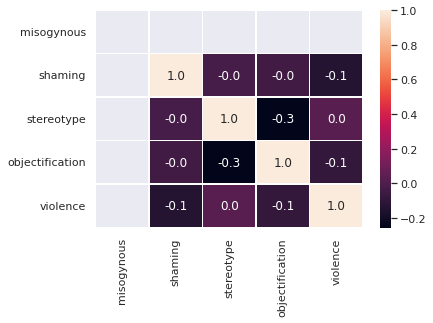

In [ ]:
comat = data[data['misogynous'] == 1].corr()
sns.heatmap(comat, annot=True, fmt=".1f", linewidths=0.5)

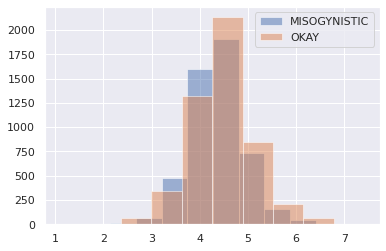

In [ ]:
data.loc[data['misogynous'] == 1, 'Text Transcription'].str.len().apply(np.log1p).hist(label='MISOGYNISTIC', alpha=.5)
data.loc[data['misogynous'] == 0, 'Text Transcription'].str.len().apply(np.log1p).hist(label='OKAY', alpha=.5)
plt.legend()

In [ ]:
data.loc[data['misogynous'] == 1, 'Text Transcription'].value_counts()

IF YOU WATCH CINDERELLA BACKWARDS IT'S ABOUT A WOMAN WHO LEARNS HER PLACE                                                             2
I'M NOT SEXIST. SEXISM IS WRONG AND BEING WRONG IS FOR WOMEN                                                                          2
Wanna know the difference between an UFO and a woman driving? Turn your phone upside down...                                          2
When you buy your side chick and your main chick the same perfume so you can cheat in peace                                           2
From this point on, all your opinions are rejected! WOMEN Know Your Place.                                                            2
                                                                                                                                     ..
YOU WON'T BE LAUGHING AFTER YOU FINISH THAT DRINK imgflip.com                                                                         1
International Mens' Day: *Exists* Feminists: Vis

In [ ]:
data.loc[data['misogynous'] == 0, 'Text Transcription'].value_counts()

Call the ambulance! But not for me!                                                                                                                                               4
My girlfriend when I fart My girlfriend when she farts                                                                                                                            2
Looks like this pigeon had a pretty intense phone call                                                                                                                            2
When you tell your friends that you finally got a girlfriend but they start laughing saying that she's imaginary but then you laugh at them because they are imaginary as well    2
PEOPLE WHO SAY CORONAVIRUS PEOPLE WHO SAY COVID-19 PEOPLE WHO CALL IT THE 'RONA                                                                                                   2
                                                                                                    

In [ ]:
STOP_WORDS = stopwords.words()
def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text



In [ ]:
miso = data[data['misogynous'] == 1]['Text Transcription'].apply(cleaning)

word_count = Counter(" ".join(miso).split()).most_common(20)
word_frequency_miso = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency_miso)

             Word  Frequency
0           women        872
1            like        537
2           woman        430
3            dont        319
4            girl        311
5           girls        307
6      imgflipcom        291
7             get        263
8    quickmemecom        233
9         kitchen        226
10       feminist        224
11           make        202
12           wife        181
13          youre        176
14      feminists        170
15         female        170
16  memecentercom        163
17           know        157
18       feminism        156
19           meme        156


In [ ]:
Notmiso = data[data['misogynous'] == 0]['Text Transcription'].apply(cleaning)

word_count = Counter(" ".join(Notmiso).split()).most_common(20)
word_frequency_notmiso = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency_notmiso)

          Word  Frequency
0   imgflipcom        362
1   girlfriend        357
2        house        337
3         like        324
4         wife        307
5         dont        298
6         call        294
7          get        273
8       people        242
9        women        229
10       woman        224
11       youre        214
12       clean        202
13       cheat        192
14     kitchen        187
15      female        183
16     cooking        176
17        know        167
18        time        156
19         see        153
